In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

plt.rcParams["font.size"] = 25

In [3]:
symbols = {}

for id, symbol in zip([1,2,3,4,5,6,7,8,9,10], 
                        ["o", "D", '*', "<", "X", "^", ">","v", "P", "p"]):
    symbols["Expert_{}".format(id)] = symbol
symbols

{'Expert_1': 'o',
 'Expert_2': 'D',
 'Expert_3': '*',
 'Expert_4': '<',
 'Expert_5': 'X',
 'Expert_6': '^',
 'Expert_7': '>',
 'Expert_8': 'v',
 'Expert_9': 'P',
 'Expert_10': 'p'}

In [4]:
def read_json(path:Path):
    with open(str(path), 'r') as f:
        results = json.load(f)
        
    return results

In [5]:
path = Path("Results/")

In [6]:
ground_truth = ["GroundTruth", 0.9053655791282654]

In [7]:
accuracys = {file.stem: read_json(file) for file in path.glob("*.json")}
accuracys

{'NrExperts_Algorithm': {'NrExperts_10': 0.9088863730430603,
  'NrExperts_2': 0.9030371069908142,
  'NrExperts_3': 0.9006749033927918,
  'NrExperts_4': 0.9030371069908142,
  'NrExperts_5': 0.9050618529319763,
  'NrExperts_6': 0.9032620787620544,
  'NrExperts_7': 0.9098987460136414,
  'NrExperts_8': 0.9055117964744568,
  'NrExperts_9': 0.9082114577293396},
 'NrExperts_Annotation': {'NrExperts_10': 0.8598425269126893,
  'NrExperts_2': 0.8482564806938171,
  'NrExperts_3': 0.8714285731315613,
  'NrExperts_4': 0.8906636595726013,
  'NrExperts_5': 0.883689534664154,
  'NrExperts_6': 0.8813273310661316,
  'NrExperts_7': 0.8737907767295837,
  'NrExperts_8': 0.871091115474701,
  'NrExperts_9': 0.8610798716545105},
 'Single_Algorithm': {'Participant_1': 0.897075355052948,
  'Participant_10': 0.9012373328208924,
  'Participant_2': 0.9055117964744568,
  'Participant_3': 0.8959504961967468,
  'Participant_4': 0.9060742259025574,
  'Participant_5': 0.9043869376182556,
  'Participant_6': 0.9010123610

In [8]:
data = []

for key, value in accuracys.items():
    name_splits = key.split("_")
    data_source = name_splits[0]
    mode = name_splits[1]
    
    for expert, acc in value.items():
        data.append([expert.replace("Participant", "Expert"), acc, mode, data_source, int(expert.split("_")[1])])
    
results = pd.DataFrame(data, columns=['Name', 'Accuracy', 'ProjectType', 'Source', "Order"])
#results.head()
results = results.sort_values(["ProjectType", "Source", "Order"])
results

,Name,Accuracy,ProjectType,Source,Order
1,NrExperts_2,0.903037,Algorithm,NrExperts,2
2,NrExperts_3,0.900675,Algorithm,NrExperts,3
3,NrExperts_4,0.903037,Algorithm,NrExperts,4
4,NrExperts_5,0.905062,Algorithm,NrExperts,5
5,NrExperts_6,0.903262,Algorithm,NrExperts,6
6,NrExperts_7,0.909899,Algorithm,NrExperts,7
7,NrExperts_8,0.905512,Algorithm,NrExperts,8
8,NrExperts_9,0.908211,Algorithm,NrExperts,9
0,NrExperts_10,0.908886,Algorithm,NrExperts,10
18,Expert_1,0.897075,Algorithm,Single,1


### Single Annotation 

In [9]:
df = results[(results['Source'] == "Single") & (results['ProjectType'] == "Annotation")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.74 Max: 0.87  Mean: 0.84  STD: 0.04


### Single Algorithm 

In [10]:
df = results[(results['Source'] == "Single") & (results['ProjectType'] == "Algorithm")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.89 Max: 0.91  Mean: 0.90  STD: 0.01


### NrExperts Annotation

In [11]:
df = results[(results['Source'] == "NrExperts") & (results['ProjectType'] == "Annotation")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.85 Max: 0.89  Mean: 0.87  STD: 0.01


### NrExperts Algorithm

In [12]:
df = results[(results['Source'] == "NrExperts") & (results['ProjectType'] == "Algorithm")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.90 Max: 0.91  Mean: 0.91  STD: 0.00


### VotesLoss Annotation

In [13]:
df = results[(results['Source'] == "VotesLoss") & (results['ProjectType'] == "Annotation")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.85 Max: 0.91  Mean: 0.88  STD: 0.02


### VotesLoss Algorithm

In [14]:
df = results[(results['Source'] == "VotesLoss") & (results['ProjectType'] == "Algorithm")]['Accuracy']
print("Min: {0:.2f} Max: {1:.2f}  Mean: {2:.2f}  STD: {3:.2f}".format(np.min(df), np.max(df), np.mean(df), np.std(df)))

Min: 0.90 Max: 0.91  Mean: 0.91  STD: 0.00


In [23]:
nr_offset = {2: -0.1, 3: -0.075, 4: -0.05, 5: -0.025, 6: 0.0, 7: 0.025, 8: 0.05, 9: 0.075,  10: 0.1}
nr_offset_expert = {1: -0.125, 2: -0.1, 3: -0.075, 4: -0.05, 5: -0.025, 6: 0.0, 7: 0.025, 8: 0.05, 9: 0.075,  10: 0.1}

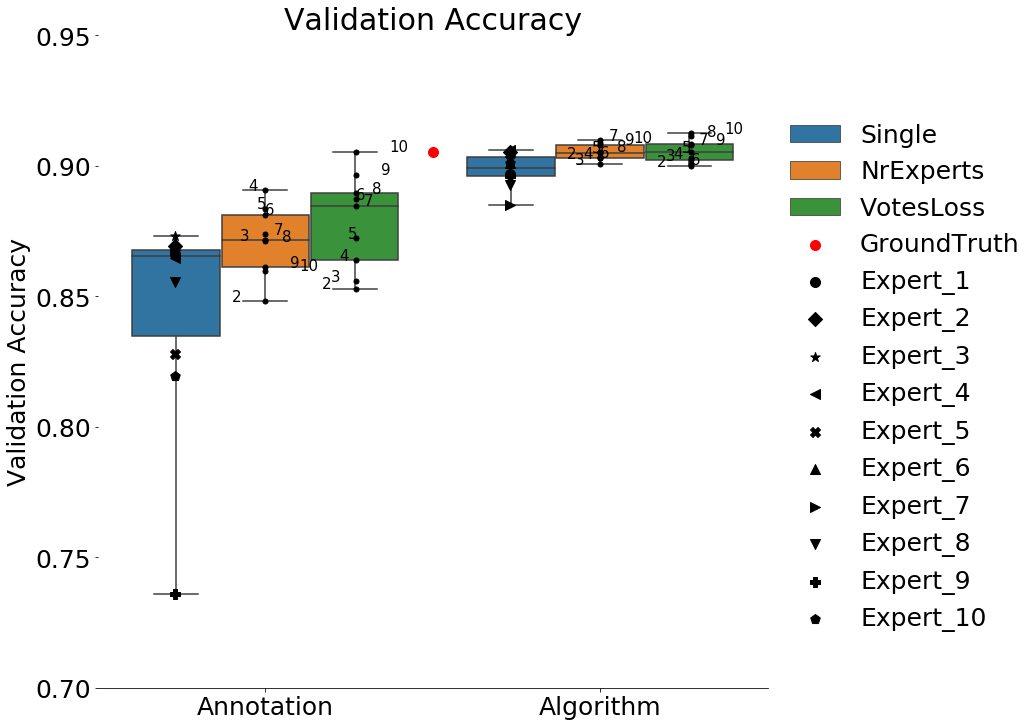

In [16]:
f, ax = plt.subplots(figsize=(12, 12))
ax.set(ylim=(0.7, 0.95))

temp = results
ax = sns.boxplot(x="ProjectType", y="Accuracy", data= temp, showfliers=False, hue='Source', whis=np.inf,
                 order=["Annotation", "Algorithm"],
                hue_order=["Single",  "NrExperts", "VotesLoss"]) #

# GT Point
plt.scatter(x=0 + 0.5, y=ground_truth[1], s=100, zorder=100, c='red', label=ground_truth[0])  


for index, row in enumerate(temp.values.tolist()):
    name  = row[0]
    value = row[1]
    project_type = row[2]    
    source = row[3]
    
    
    type_offset = -0.27
    if source == "NrExperts":
        type_offset = 0.0
    elif source == "VotesLoss":
        type_offset = 0.27

    if project_type == "Annotation":
        if name in symbols:
            plt.scatter(x=0 + type_offset, y=value, s=100, zorder=100, c='black', label=name, marker=symbols[name])  
        else:
            number = int(name.split('_')[1])
            
            plt.scatter(x=0 + type_offset, y=value, s=100, zorder=100, c='black', marker='.')
            plt.text(x=0 + type_offset + nr_offset[number], y=value, s=str(number), fontsize=15, zorder=150) 
    elif project_type == "Algorithm":
        if  name in symbols:
            plt.scatter(x=1 + type_offset, y=value, s=100, zorder=100, c='black', label=name, marker=symbols[name])  
        else:
            number = int(name.split('_')[1])
            
            plt.scatter(x=1 + type_offset, y=value, s=100, zorder=100, c='black', marker='.')
            plt.text(x=1 + type_offset + nr_offset[number], y=value, s=str(number), fontsize=15, zorder=150)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), frameon=False)

ax.set(ylabel="Validation Accuracy", xlabel="", title="Validation Accuracy")
sns.despine(left=True)

plt.savefig("ValidationAccuracy.pdf", transparent=True)

In [17]:
list(nr_offset.values())

[-0.1, -0.075, -0.05, -0.025, 0.0, 0.025, 0.05, 0.075, 0.1]

In [18]:
y_values = list(results[(results['ProjectType'] == 'Annotation') & (results['Source'] == 'NrExperts')]['Accuracy'])
x_values = list(nr_offset.values())

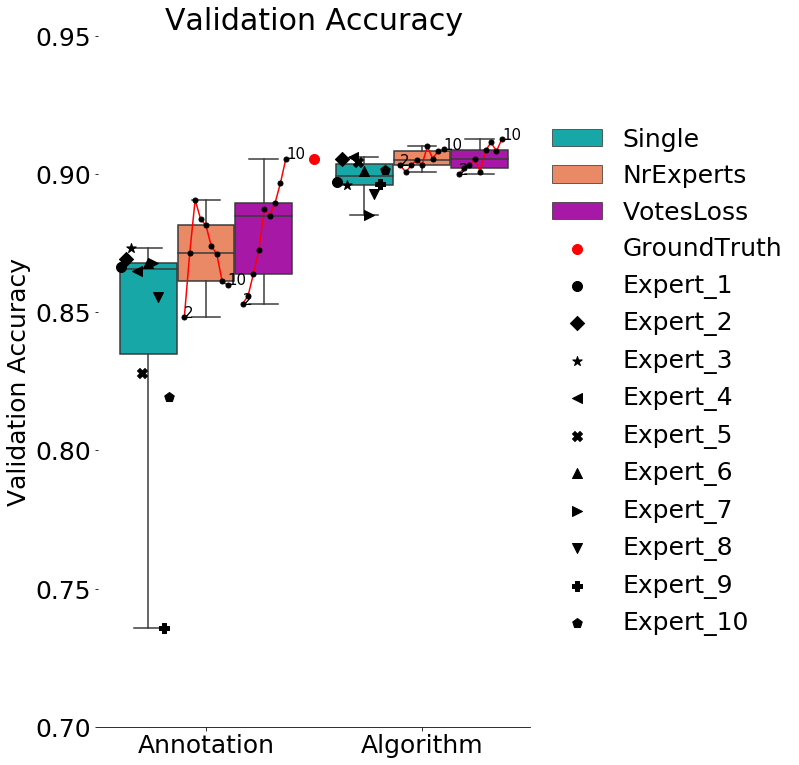

In [32]:
f, ax = plt.subplots(figsize=(12, 12))
ax.set_position([0.1,0.1,0.5,0.8])


ax.set(ylim=(0.7, 0.95))

temp = results

my_pal = {"Single": "c", "NrExperts": "coral", "VotesLoss":"m"} #my_pal = {"Single": "c", "NrExperts": "p", "VotesLoss":"m"}
ax = sns.boxplot(x="ProjectType", y="Accuracy", data= temp, showfliers=False, hue='Source', whis=np.inf,
                 order=["Annotation", "Algorithm"], palette=my_pal,
                hue_order=["Single",  "NrExperts", "VotesLoss"]) #

# GT Point
plt.scatter(x=0 + 0.5, y=ground_truth[1], s=100, zorder=100, c='red', label=ground_truth[0])  



for index, row in enumerate(temp.values.tolist()):
    name  = row[0]
    value = row[1]
    project_type = row[2]    
    source = row[3]
    number = int(name.split('_')[1])
    
    
    type_offset = -0.27
    if source == "NrExperts":
        type_offset = 0.0
    elif source == "VotesLoss":
        type_offset = 0.27

    if project_type == "Annotation":
        if name in symbols:
            plt.scatter(x=0 + type_offset + nr_offset_expert[number], y=value, s=100, zorder=100, c='black', label=name, marker=symbols[name])  
        else:
            plt.scatter(x=0 + type_offset + nr_offset[number], y=value, s=100, zorder=100, c='black', marker='.')
            
            if number == 2 or number == 10:
                plt.text(x=0 + type_offset + nr_offset[number], y=value, s=str(number), fontsize=15, zorder=150) 
    elif project_type == "Algorithm":
        if  name in symbols:
            plt.scatter(x=1 + type_offset + nr_offset_expert[number], y=value, s=100, zorder=100, c='black', label=name, marker=symbols[name])  
        else:
            
            plt.scatter(x=1 + type_offset + nr_offset[number], y=value, s=100, zorder=100, c='black', marker='.')
            
            if number == 2 or number == 10:
                plt.text(x=1 + type_offset + nr_offset[number], y=value, s=str(number), fontsize=15, zorder=150)

# Draw a line to connect points
y_values = list(results[(results['ProjectType'] == 'Annotation') & (results['Source'] == 'NrExperts')]['Accuracy'])
x_values = [item for item in nr_offset.values()]
#y_values[0], y_values[-1] = y_values[-1], y_values[0]
plt.plot(x_values, y_values, c='red')

y_values = list(results[(results['ProjectType'] == 'Algorithm') & (results['Source'] == 'NrExperts')]['Accuracy'])
x_values = [item + 1 for item in nr_offset.values()]
#y_values[0], y_values[-1] = y_values[-1], y_values[0]
plt.plot(x_values, y_values, c='red')


y_values = list(results[(results['ProjectType'] == 'Annotation') & (results['Source'] == 'VotesLoss')]['Accuracy'])
x_values = [item + 0.27 for item in nr_offset.values()]
#y_values[0], y_values[-1] = y_values[-1], y_values[0]
plt.plot(x_values, y_values, c='red')

y_values = list(results[(results['ProjectType'] == 'Algorithm') & (results['Source'] == 'VotesLoss')]['Accuracy'])
x_values = [item + 1 + 0.27 for item in nr_offset.values()]
#y_values[0], y_values[-1] = y_values[-1], y_values[0]
plt.plot(x_values, y_values, c='red')


            
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1., 0.9), frameon=False)

ax.set(ylabel="Validation Accuracy Mitotic Figure", xlabel="", title="Validation Accuracy")
sns.despine(left=True)

plt.savefig("ValidationAccuracy.pdf", transparent=True)